## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
import tensorflow as tf
tf.set_random_seed(42)
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
x_test shape: (10000, 28, 28)
10000 test samples


In [4]:
print('y_train shape:', y_train.shape)
print(y_train.shape[0], 'train samples')
print('y_test shape:', y_test.shape)
print(y_test.shape[0], 'test samples')

y_train shape: (60000,)
60000 train samples
y_test shape: (10000,)
10000 test samples


### Find dimensions of an image in the dataset

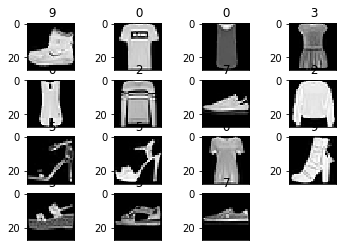

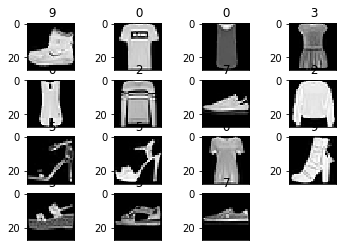

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(15):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title(" {}".format(y_train[i]))
  plt.xticks([])
fig

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Normalize both the train and test image data from 0-255 to 0-1

In [8]:
# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [9]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(33, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
# Add Flatten before passing the feature map into 2 fully connected layers
model.add(Flatten())

Instructions for updating:
Colocations handled automatically by placer.


### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [11]:
#Hidden layers
model.add(Dense(128, activation='relu', name='Layer_1'))
model.add(Dense(10, activation='softmax', name='Layer_2'))
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [12]:
#Train the model
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10, callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.4134 - acc: 0.8613 - val_loss: 0.3656 - val_acc: 0.8679
Epoch 2/10
60000/60000 [==============================] - 360s 6ms/step - loss: 0.2419 - acc: 0.9116 - val_loss: 0.3233 - val_acc: 0.8831
Epoch 3/10
60000/60000 [==============================] - 416s 7ms/step - loss: 0.1839 - acc: 0.9323 - val_loss: 0.2936 - val_acc: 0.9020
Epoch 4/10
60000/60000 [==============================] - 392s 7ms/step - loss: 0.1454 - acc: 0.9466 - val_loss: 0.3120 - val_acc: 0.9008
Epoch 5/10
60000/60000 [==============================] - 333s 6ms/step - loss: 0.1130 - acc: 0.9580 - val_loss: 0.4389 - val_acc: 0.8916
Epoch 6/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.0930 - acc: 0.9655 - val_loss: 0.3722 - val_acc: 0.8965
Epoch 7/10
60000/60000 [==============================] - 329s 5ms/step - 

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 33)        9537      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 33)        132       
_________________________________________________________________
flatten_1 (Flatten)          (None, 19008)             0         
_________________________________________________________________
Layer_1 (Dense)              (None, 128)               2433152   
_________________________________________________________________
Layer_2 (Dense)              (None, 10)                1290      
Total para

In [14]:
score = model.evaluate(x_test, y_test)
print('accuracy: ',score[1]*100)
print('loss: ',score[0])

10000/10000 [==============================] - 8s 791us/step
accuracy:  90.60000000000001
loss:  0.48140430128499867


In [15]:
score = model.evaluate(x_train, y_train)
print('accuracy: ',score[1]*100)
print('loss: ',score[0])

60000/60000 [==============================] - 54s 902us/step
accuracy:  98.31166666666667
loss:  0.047757438810319096


#### **Insights**
##### --> Actual Accuracy Score is 98.31% and Valication / testing accuracy score is 90.60% 

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [16]:

EPOCHS = 10

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(33, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
# Add MaxPooling2D and Dropput after the convolution layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Hidden layers
model.add(Dense(128, activation='relu', name='Layer_1'))
model.add(Dense(10, activation='softmax', name='Layer_2'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Compile the Model and Train the model 

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [19]:
#Train the model
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=EPOCHS, callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 265s 4ms/step - loss: 0.3892 - acc: 0.8617 - val_loss: 0.3151 - val_acc: 0.8908
Epoch 2/10
60000/60000 [==============================] - 265s 4ms/step - loss: 0.2552 - acc: 0.9059 - val_loss: 0.2708 - val_acc: 0.9028
Epoch 3/10
60000/60000 [==============================] - 273s 5ms/step - loss: 0.2156 - acc: 0.9195 - val_loss: 0.3015 - val_acc: 0.8912
Epoch 4/10
60000/60000 [==============================] - 271s 5ms/step - loss: 0.1888 - acc: 0.9292 - val_loss: 0.2582 - val_acc: 0.9135
Epoch 5/10
60000/60000 [==============================] - 270s 4ms/step - loss: 0.1617 - acc: 0.9388 - val_loss: 0.3060 - val_acc: 0.8940
Epoch 6/10
60000/60000 [==============================] - 271s 5ms/step - loss: 0.1451 - acc: 0.9462 - val_loss: 0.2610 - val_acc: 0.9147
Epoch 7/10
60000/60000 [==============================] - 275s 5ms/step - loss: 0.1252 - acc: 0.9537 - val_loss: 0.2573 - 

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 33)        9537      
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 33)        132       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 33)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 33)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4752)              0         
__________

In [21]:
score = model.evaluate(x_test, y_test)
print('accuracy: ',score[1]*100)
print('loss: ',score[0])

10000/10000 [==============================] - 8s 800us/step
accuracy:  92.03
loss:  0.29645602995604275


In [22]:
score = model.evaluate(x_train, y_train)
print('accuracy: ',score[1]*100)
print('loss: ',score[0])

60000/60000 [==============================] - 54s 894us/step
accuracy:  98.03333333333333
loss:  0.05436772976798626


#### **Insights**
##### --> Actual Accuracy Score is 98.03% and Valication / testing accuracy score is 92.03% 